In [ ]:
# Import libraries

import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'colab'   # try changing this in case your plots aren't shown
from plotly.subplots import make_subplots

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1t = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-AGE-zp-2020.xlsx', 'Total', skiprows=15)
df1t = df1t.iloc[1: , :] #delete first row because it was empty
df1t

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
1,001,Cholera,.,.,.,.,.,.,.,.,...,.,.,1,.,.,.,.,.,.,2
2,002,Typhus abdominalis und Paratyphus,1,1,.,.,.,1,.,.,...,.,.,.,.,.,.,.,.,.,4
3,003,Shigellose [Bakterielle Ruhr],1,.,.,1,.,1,3,1,...,2,.,2,.,1,3,1,.,.,19
4,004,Amöbiasis [Amöbenruhr],.,.,.,.,.,3,1,2,...,1,.,1,1,3,.,1,.,.,15
5,005,"Diarrhoe und Gastroenteritis, vermutlich infek...",364,123,94,146,122,113,136,104,...,191,234,210,318,325,324,302,150,39,3717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,295,Lebendgeborene nach dem Geburtsort,54357,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,54357
277,296,Postpartale Betreuung und Untersuchung,1,.,.,5,52,239,543,310,...,.,.,.,.,.,.,.,.,.,1216
278,297,"Personen, die das Gesundheitswesen zum Zwecke ...",948,18,18,57,112,161,166,232,...,297,280,215,229,252,244,179,104,35,4374
279,298,"Personen, die das Gesundheitswesen aus sonstig...",1386,29,34,27,25,20,23,30,...,67,90,140,230,302,329,398,254,101,3585


In [ ]:
df1t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 1 to 280
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ICD-10       280 non-null    object
 1   Bezeichnung  280 non-null    object
 2   0-4          280 non-null    object
 3   5-9          280 non-null    object
 4   10-14        280 non-null    object
 5   15-19        280 non-null    object
 6   20-24        280 non-null    object
 7   25-29        280 non-null    object
 8   30-34        280 non-null    object
 9   35-39        280 non-null    object
 10  40-44        280 non-null    object
 11  45-49        280 non-null    object
 12  50-54        280 non-null    object
 13  55-59        280 non-null    object
 14  60-64        280 non-null    object
 15  65-69        280 non-null    object
 16  70-74        280 non-null    object
 17  75-79        280 non-null    object
 18  80-84        280 non-null    object
 19  85-89        280 non-null    

In [ ]:
df1f = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-AGE-zp-2020.xlsx', 'Frauen', skiprows=15)
df1f = df1f.iloc[1: , :] #delete first row because it was empty
df1f

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
1,001,Cholera,.,.,.,.,.,.,.,.,...,.,.,1,.,.,.,.,.,.,1
2,002,Typhus abdominalis und Paratyphus,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,1
3,003,Shigellose [Bakterielle Ruhr],1,.,.,.,.,.,1,.,...,.,.,1,.,1,1,.,.,.,6
4,004,Amöbiasis [Amöbenruhr],.,.,.,.,.,1,.,1,...,.,.,1,.,1,.,.,.,.,4
5,005,"Diarrhoe und Gastroenteritis, vermutlich infek...",160,66,48,88,70,75,78,56,...,113,140,122,190,218,208,207,103,31,2211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,295,Lebendgeborene nach dem Geburtsort,27127,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,27127
266,296,Postpartale Betreuung und Untersuchung,.,.,.,5,52,239,543,310,...,.,.,.,.,.,.,.,.,.,1215
267,297,"Personen, die das Gesundheitswesen zum Zwecke ...",485,11,3,43,93,144,139,215,...,221,177,115,104,104,100,92,56,17,2797
268,298,"Personen, die das Gesundheitswesen aus sonstig...",674,19,17,20,19,13,12,22,...,35,43,80,136,183,211,235,167,74,2016


In [ ]:
df1f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 1 to 269
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ICD-10       269 non-null    object
 1   Bezeichnung  269 non-null    object
 2   0-4          269 non-null    object
 3   5-9          269 non-null    object
 4   10-14        269 non-null    object
 5   15-19        269 non-null    object
 6   20-24        269 non-null    object
 7   25-29        269 non-null    object
 8   30-34        269 non-null    object
 9   35-39        269 non-null    object
 10  40-44        269 non-null    object
 11  45-49        269 non-null    object
 12  50-54        269 non-null    object
 13  55-59        269 non-null    object
 14  60-64        269 non-null    object
 15  65-69        269 non-null    object
 16  70-74        269 non-null    object
 17  75-79        269 non-null    object
 18  80-84        269 non-null    object
 19  85-89        269 non-null    

In [ ]:
df1m = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-AGE-zp-2020.xlsx', 'Männer', skiprows=15)
df1m = df1m.iloc[1: , :] #delete first row because it was empty
df1m

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
1,001,Cholera,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,1
2,002,Typhus abdominalis und Paratyphus,1,1,.,.,.,1,.,.,...,.,.,.,.,.,.,.,.,.,3
3,003,Shigellose [Bakterielle Ruhr],.,.,.,1,.,1,2,1,...,2,.,1,.,.,2,1,.,.,13
4,004,Amöbiasis [Amöbenruhr],.,.,.,.,.,2,1,1,...,1,.,.,1,2,.,1,.,.,11
5,005,"Diarrhoe und Gastroenteritis, vermutlich infek...",204,57,46,58,52,38,58,48,...,78,94,88,128,107,116,95,47,8,1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,295,Lebendgeborene nach dem Geburtsort,27230,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,27230
251,296,Postpartale Betreuung und Untersuchung,1,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,1
252,297,"Personen, die das Gesundheitswesen zum Zwecke ...",463,7,15,14,19,17,27,17,...,76,103,100,125,148,144,87,48,18,1577
253,298,"Personen, die das Gesundheitswesen aus sonstig...",712,10,17,7,6,7,11,8,...,32,47,60,94,119,118,163,87,27,1569


In [ ]:
df1m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ICD-10       254 non-null    object
 1   Bezeichnung  254 non-null    object
 2   0-4          254 non-null    object
 3   5-9          254 non-null    object
 4   10-14        254 non-null    object
 5   15-19        254 non-null    object
 6   20-24        254 non-null    object
 7   25-29        254 non-null    object
 8   30-34        254 non-null    object
 9   35-39        254 non-null    object
 10  40-44        254 non-null    object
 11  45-49        254 non-null    object
 12  50-54        254 non-null    object
 13  55-59        254 non-null    object
 14  60-64        254 non-null    object
 15  65-69        254 non-null    object
 16  70-74        254 non-null    object
 17  75-79        254 non-null    object
 18  80-84        254 non-null    object
 19  85-89        254 non-null    

# Data Explanations

**Jahr** - year

**ICD-10 Kode** - Diagnosis codes according to ICD-10 GM (version 2018)

**N** - Number of inpatient cases (excluding day-care and outpatient cases) of type A (discharges) and C (long-term stays) delivered with a calculable length of stay

**DAD** - Average length of stay. Calculated as follows: [exit date - entry date], in days.

**S.A** - Standard deviation

then we have the **min max and percentiles**

In [ ]:
df2t = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-ICD-zp-2020.xlsx', 'Total', skiprows=20)
df2t = df2t.iloc[1: , :] #delete first row because it was empty
df2t

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
1,2020.0,A000,"Cholera durch Vibrio cholerae 01, Biovar cholerae",1.0,13.000000,.,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2,2020.0,A009,"Cholera, nicht näher bezeichnet",1.0,19.000000,.,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2020.0,A010,Typhus abdominalis,3.0,6.000000,4.582576,2.0,11.0,2.0,2.0,2.0,5.0,11.0,11.0,11.0
4,2020.0,A011,Paratyphus A,1.0,5.000000,.,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,2020.0,A020,Salmonellenenteritis,257.0,4.692607,3.539242,1.0,21.0,1.0,2.0,2.0,4.0,6.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,2020.0,Z9668,Vorhandensein von sonstigen näher bezeichneten...,1.0,12.000000,.,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
8919,2020.0,Z967,Vorhandensein von anderen Knochen- und Sehneni...,1.0,13.000000,.,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
8920,2020.0,Z9688,Vorhandensein von sonstigen näher bezeichneten...,1.0,20.000000,.,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
8921,2020.0,Z981,Zustand nach Arthrodese,3.0,35.333333,13.051181,23.0,49.0,23.0,23.0,23.0,34.0,49.0,49.0,49.0


In [ ]:
df2t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 1 to 8922
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jahr         8922 non-null   float64
 1   ICD-10 Kode  8922 non-null   object 
 2   Unnamed: 2   8922 non-null   object 
 3   N            8922 non-null   float64
 4   DAD          8922 non-null   float64
 5   S.A          8922 non-null   object 
 6   Min          8922 non-null   float64
 7   Max          8922 non-null   float64
 8   5            8922 non-null   float64
 9   10           8922 non-null   float64
 10  25           8922 non-null   float64
 11  50           8922 non-null   float64
 12  75           8922 non-null   float64
 13  90           8922 non-null   float64
 14  95           8922 non-null   float64
dtypes: float64(12), object(3)
memory usage: 1.0+ MB


In [ ]:
df2_14 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-ICD-zp-2020.xlsx', '0-14', skiprows=20)
df2_14 = df2_14.iloc[1: , :] #delete first row because it was empty
df2_14

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
1,2020.0,A010,Typhus abdominalis,2.0,3.500000,2.12132,2.0,5.0,2.0,2.0,2.0,3.5,5.0,5.0,5.0
2,2020.0,A020,Salmonellenenteritis,56.0,3.053571,1.762433,1.0,10.0,1.0,2.0,2.0,2.0,4.0,5.0,6.0
3,2020.0,A022,Lokalisierte Salmonelleninfektionen,1.0,8.000000,.,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
4,2020.0,A028,Sonstige näher bezeichnete Salmonelleninfektionen,3.0,6.666667,2.081666,5.0,9.0,5.0,5.0,5.0,6.0,9.0,9.0,9.0
5,2020.0,A039,"Shigellose, nicht näher bezeichnet",1.0,3.000000,.,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,2020.0,Z833,Diabetes mellitus in der Familienanamnese,1066.0,3.041276,1.181303,0.0,14.0,1.0,2.0,2.0,3.0,4.0,4.0,5.0
3656,2020.0,Z834,"Andere endokrine, Ernährungs- oder Stoffwechse...",34.0,2.735294,1.109431,1.0,6.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0
3657,2020.0,Z836,Krankheiten der Atemwege in der Familienanamnese,1.0,3.000000,.,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3658,2020.0,Z841,Krankheiten der Niere oder des Ureters in der ...,2.0,3.000000,1.414214,2.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0


In [ ]:
df2_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 1 to 3659
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jahr         3659 non-null   float64
 1   ICD-10 Kode  3659 non-null   object 
 2   Unnamed: 2   3659 non-null   object 
 3   N            3659 non-null   float64
 4   DAD          3659 non-null   float64
 5   S.A          3659 non-null   object 
 6   Min          3659 non-null   float64
 7   Max          3659 non-null   float64
 8   5            3659 non-null   float64
 9   10           3659 non-null   float64
 10  25           3659 non-null   float64
 11  50           3659 non-null   float64
 12  75           3659 non-null   float64
 13  90           3659 non-null   float64
 14  95           3659 non-null   float64
dtypes: float64(12), object(3)
memory usage: 428.9+ KB


In [ ]:
df2_39 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-ICD-zp-2020.xlsx', '15-39', skiprows=20)
df2_39 = df2_39.iloc[1: , :] #delete first row because it was empty
df2_39

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
1,2020.0,A011,Paratyphus A,1.0,5.000000,.,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,2020.0,A020,Salmonellenenteritis,57.0,2.912281,1.392335,1.0,6.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0
3,2020.0,A021,Salmonellensepsis,2.0,4.500000,3.535534,2.0,7.0,2.0,2.0,2.0,4.5,7.0,7.0,7.0
4,2020.0,A029,"Salmonelleninfektion, nicht näher bezeichnet",1.0,1.000000,.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2020.0,A033,Shigellose durch Shigella sonnei,2.0,3.000000,1.414214,2.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,2020.0,Z9172,Weibliche Genitalverstümmelung in der Eigenana...,2.0,3.500000,0.707107,3.0,4.0,3.0,3.0,3.0,3.5,4.0,4.0,4.0
5734,2020.0,Z9173,Weibliche Genitalverstümmelung in der Eigenana...,5.0,1.400000,0.894427,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0
5735,2020.0,Z940,Zustand nach Nierentransplantation,2.0,3.500000,3.535534,1.0,6.0,1.0,1.0,1.0,3.5,6.0,6.0,6.0
5736,2020.0,Z941,Zustand nach Herztransplantion,1.0,32.000000,.,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0


In [ ]:
df2_39.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 1 to 5737
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jahr         5737 non-null   float64
 1   ICD-10 Kode  5737 non-null   object 
 2   Unnamed: 2   5737 non-null   object 
 3   N            5737 non-null   float64
 4   DAD          5737 non-null   float64
 5   S.A          5737 non-null   object 
 6   Min          5737 non-null   float64
 7   Max          5737 non-null   float64
 8   5            5737 non-null   float64
 9   10           5737 non-null   float64
 10  25           5737 non-null   float64
 11  50           5737 non-null   float64
 12  75           5737 non-null   float64
 13  90           5737 non-null   float64
 14  95           5737 non-null   float64
dtypes: float64(12), object(3)
memory usage: 672.4+ KB


In [ ]:
df2_69 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-ICD-zp-2020.xlsx', '40-69', skiprows=20)
df2_69 = df2_69.iloc[1: , :] #delete first row because it was empty
df2_69

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
1,2020.0,A000,"Cholera durch Vibrio cholerae 01, Biovar cholerae",1.0,13.000000,.,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2,2020.0,A009,"Cholera, nicht näher bezeichnet",1.0,19.000000,.,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2020.0,A010,Typhus abdominalis,1.0,11.000000,.,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
4,2020.0,A020,Salmonellenenteritis,77.0,4.779221,2.958589,1.0,21.0,2.0,2.0,3.0,4.0,6.0,7.0,11.0
5,2020.0,A021,Salmonellensepsis,6.0,12.333333,7.118052,5.0,23.0,5.0,5.0,7.0,10.0,19.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,2020.0,Z9665,Vorhandensein einer Kniegelenkprothese,2.0,18.500000,7.778175,13.0,24.0,13.0,13.0,13.0,18.5,24.0,24.0,24.0
6935,2020.0,Z9667,Vorhandensein einer Bandscheibenprothese,1.0,20.000000,.,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
6936,2020.0,Z9668,Vorhandensein von sonstigen näher bezeichneten...,1.0,12.000000,.,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
6937,2020.0,Z981,Zustand nach Arthrodese,1.0,49.000000,.,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0


In [ ]:
df2_69.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6938 entries, 1 to 6938
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jahr         6938 non-null   float64
 1   ICD-10 Kode  6938 non-null   object 
 2   Unnamed: 2   6938 non-null   object 
 3   N            6938 non-null   float64
 4   DAD          6938 non-null   float64
 5   S.A          6938 non-null   object 
 6   Min          6938 non-null   float64
 7   Max          6938 non-null   float64
 8   5            6938 non-null   float64
 9   10           6938 non-null   float64
 10  25           6938 non-null   float64
 11  50           6938 non-null   float64
 12  75           6938 non-null   float64
 13  90           6938 non-null   float64
 14  95           6938 non-null   float64
dtypes: float64(12), object(3)
memory usage: 813.2+ KB


In [ ]:
df2_70 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Medico Final Project/Medico Data/su-d-14.04.01.02-ICD-zp-2020.xlsx', '70+', skiprows=20)
df2_70 = df2_70.iloc[1: , :] #delete first row because it was empty
df2_70

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
1,2020.0,A020,Salmonellenenteritis,67.0,7.477612,4.623255,1.0,21.0,2.0,3.0,4.0,7.0,9.0,15.0,18.0
2,2020.0,A021,Salmonellensepsis,15.0,13.333333,7.659417,0.0,30.0,0.0,5.0,8.0,13.0,18.0,24.0,30.0
3,2020.0,A022,Lokalisierte Salmonelleninfektionen,4.0,15.000000,10.066446,5.0,29.0,5.0,5.0,9.0,13.0,21.0,29.0,29.0
4,2020.0,A028,Sonstige näher bezeichnete Salmonelleninfektionen,1.0,5.000000,.,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,2020.0,A029,"Salmonelleninfektion, nicht näher bezeichnet",1.0,12.000000,.,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,2020.0,Z9667,Vorhandensein einer Bandscheibenprothese,1.0,13.000000,.,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
5974,2020.0,Z967,Vorhandensein von anderen Knochen- und Sehneni...,1.0,13.000000,.,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
5975,2020.0,Z9688,Vorhandensein von sonstigen näher bezeichneten...,1.0,20.000000,.,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
5976,2020.0,Z981,Zustand nach Arthrodese,2.0,28.500000,7.778175,23.0,34.0,23.0,23.0,23.0,28.5,34.0,34.0,34.0


In [ ]:
df2_70.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5977 entries, 1 to 5977
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jahr         5977 non-null   float64
 1   ICD-10 Kode  5977 non-null   object 
 2   Unnamed: 2   5977 non-null   object 
 3   N            5977 non-null   float64
 4   DAD          5977 non-null   float64
 5   S.A          5977 non-null   object 
 6   Min          5977 non-null   float64
 7   Max          5977 non-null   float64
 8   5            5977 non-null   float64
 9   10           5977 non-null   float64
 10  25           5977 non-null   float64
 11  50           5977 non-null   float64
 12  75           5977 non-null   float64
 13  90           5977 non-null   float64
 14  95           5977 non-null   float64
dtypes: float64(12), object(3)
memory usage: 700.6+ KB


# Tanslate data frames

In [ ]:
!pip install googletrans==3.1.0a0

import googletrans
from googletrans import Translator

     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 10.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=6d99f7e8efd4ada00b6f2c9dbf571a92b9e4a84b93d92046c3db9841761040f1
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
translator = Translator()

In [ ]:
data_frames = [df1t, df1m, df1f, df2t, df2_14, df2_39, df2_69, df2_70]

In [ ]:
for d_fr in data_frames:
  translations = {}
  for column in d_fr.columns:
      unique_elements = d_fr[column].unique()
      for element in unique_elements:
          translations[element] = translator.translate(element).text

  d_fr.replace(translations, inplace = True)
  

# Edit data frames

In [ ]:

def edit_frame(df, col_num):
  df = df.replace(['.'], 0)
  df.iloc[:, col_num:] = df.iloc[:, col_num:].astype(float) 
  return df

df1t = edit_frame(df1t, 2).sort_values(by='Total', ascending=False)
df1m = edit_frame(df1m, 2).sort_values(by='Total', ascending=False)
df1f = edit_frame(df1f, 2).sort_values(by='Total', ascending=False)
df2t = edit_frame(df2t, 3).sort_values(by='N', ascending=False)
df2_14 = edit_frame(df2_14, 3).sort_values(by='N', ascending=False)
df2_39 = edit_frame(df2_39, 3).sort_values(by='N', ascending=False)
df2_69 = edit_frame(df2_69, 3).sort_values(by='N', ascending=False)
df2_70 = edit_frame(df2_70, 3).sort_values(by='N', ascending=False)

In [ ]:
for i in [df2t, df2_14, df2_39, df2_69, df2_70]:
  i = i.rename(columns={'Unnamed: 2': 'diagnosis'})

In [ ]:
#num_deliv.to_csv('num_deliv.csv', index=False)
df1t.to_csv('total_num_cases_age.csv', index=False) 
df1m.to_csv('male_num_cases_age.csv', index=False) 
df1f.to_csv('female_num_cases_age.csv', index=False) 
df2t.to_csv('diagnosis_stat_total.csv', index=False) 
df2_14.to_csv('diagnosis_stat_until14.csv', index=False) 
df2_39.to_csv('diagnosis_stat_until39.csv', index=False) 
df2_69.to_csv('diagnosis_stat_until69.csv', index=False) 
df2_70.to_csv('diagnosis_stat_until70.csv', index=False)

In [ ]:
df2_39.tail()

,Jahr,ICD-10 Kode,Unnamed: 2,N,DAD,S.A,Min,Max,5,10,25,50,75,90,95
3165,2020.0,M6084,Other myositis : hand,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3164,2020.0,M6080,Other myositis : multiple localizations,1.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3163,2020.0,Matt 028,"Foreign body granuloma in soft tissues, not el...",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3161,2020.0,M6026,"Foreign body granuloma in soft tissues, not el...",1.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5737,2020.0,gg42,Condition after lung transplantation,1.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
df1t.head()

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
184,201,Osteoarthritis,0.0,0.0,7.0,23.0,64.0,106.0,177.0,330.0,...,5428.0,7329.0,7760.0,9988.0,9922.0,6383.0,2847.0,655.0,84.0,56531.0
276,295,live births by place of birth,54357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54357.0
225,242,Other complications during pregnancy and child...,0.0,0.0,0.0,277.0,3469.0,12846.0,20097.0,11210.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50264.0
257,274,Fractures of other parts of the extremities,465.0,1667.0,2032.0,1665.0,1518.0,1721.0,1853.0,1875.0,...,3620.0,3220.0,2985.0,2967.0,2778.0,2427.0,2066.0,1056.0,306.0,41669.0
152,169,Pneumonia,702.0,209.0,93.0,104.0,154.0,245.0,383.0,559.0,...,2680.0,3247.0,3405.0,4478.0,5057.0,5125.0,4551.0,2367.0,612.0,37979.0


In [ ]:
df1t.describe()

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
count,280,280,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,...,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0
unique,280,280,118.0,83.0,90.0,112.0,129.0,135.0,150.0,162.0,...,179.0,177.0,175.0,174.0,172.0,167.0,148.0,127.0,74.0,261.0
top,201,Osteoarthritis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
freq,1,1,90.0,112.0,92.0,61.0,58.0,46.0,45.0,37.0,...,44.0,49.0,53.0,47.0,51.0,55.0,64.0,80.0,109.0,5.0


In [ ]:
df1t_t = df1t.iloc[1:, 1:].T
df1t_t.rename(columns=df1t_t.iloc[0], inplace = True)
df1t_t.drop(df1t_t.index[0], inplace = True)
df1t_t

,live births by place of birth,Other complications during pregnancy and childbirth,Fractures of other parts of the extremities,Pneumonia,Other symptoms and abnormal clinical and laboratory findings not elsewhere classified,"Certain early complications of trauma and complications of surgery and medical treatment, not elsewhere classified",mood disorders,Other diseases of the spine and back,Other care of the mother with regard to the fetus and the amniotic cavity and possible delivery complications,Other injuries to specified and unspecified and multiple body regions,...,Consequences of malnutrition and other nutritional deficiencies,sequelae of poliomyelitis,Prenatal screening and other monitoring of pregnancy,Infestation by other trematodes (flukes),Other tetanus,relapsing fever,Filariose,Cholera,leprosy,Vitamin-A-Mangel
0-4,54357.0,0.0,465.0,702.0,1902.0,208.0,0.0,24.0,1.0,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-9,0.0,0.0,1667.0,209.0,294.0,158.0,6.0,31.0,0.0,564.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10-14,0.0,0.0,2032.0,93.0,497.0,195.0,592.0,125.0,1.0,581.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15-19,0.0,277.0,1665.0,104.0,831.0,449.0,2141.0,158.0,104.0,783.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20-24,0.0,3469.0,1518.0,154.0,700.0,613.0,1660.0,114.0,1298.0,752.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25-29,0.0,12846.0,1721.0,245.0,734.0,744.0,1806.0,224.0,5736.0,882.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30-34,0.0,20097.0,1853.0,383.0,789.0,795.0,1860.0,378.0,10105.0,907.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35-39,0.0,11210.0,1875.0,559.0,840.0,966.0,2100.0,509.0,6841.0,933.0,...,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
40-44,0.0,2233.0,1925.0,790.0,935.0,1202.0,2415.0,726.0,1690.0,1070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45-49,0.0,124.0,2373.0,1242.0,1119.0,1423.0,2814.0,1072.0,134.0,1372.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1t_t.columns.tolist()

['live births by place of birth',
 'Other complications during pregnancy and childbirth',
 'Fractures of other parts of the extremities',
 'Pneumonia',
 'Other symptoms and abnormal clinical and laboratory findings not elsewhere classified',
 'Certain early complications of trauma and complications of surgery and medical treatment, not elsewhere classified',
 'mood disorders',
 'Other diseases of the spine and back',
 'Other care of the mother with regard to the fetus and the amniotic cavity and possible delivery complications',
 'Other injuries to specified and unspecified and multiple body regions',
 'Diseases of the quail tissue',
 'intracranial injury',
 'heart failure',
 'Fracture of the Femur',
 'Stroke',
 'Other ischemic heart diseases',
 'Acute myocardial infarction',
 'conduction disorders and cardiac arrhythmias',
 'Cholelithiasis and Chelezystitis',
 'Other diseases of the joints',
 'Other mental and behavioral disorders',
 'Mental and behavioral disorders caused by alcohol'

Text(0.5, 0, 'cases')

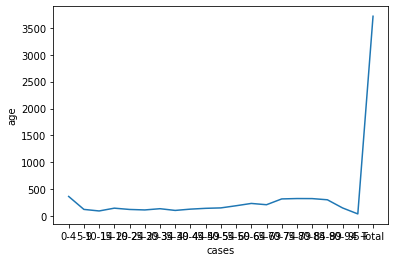

In [ ]:
fig, ax = plt.subplots()
ax.plot(df1t_t.index, df1t_t['Diarrhea and gastroenteritis, presumably of infectious origin'])
ax.set_ylabel("age")
ax.set_xlabel('cases')

In [ ]:
cols = df1t_t.columns
cols

Index(['live births by place of birth',
       'Other complications during pregnancy and childbirth',
       'Fractures of other parts of the extremities', 'Pneumonia',
       'Other symptoms and abnormal clinical and laboratory findings not elsewhere classified',
       'Certain early complications of trauma and complications of surgery and medical treatment, not elsewhere classified',
       'mood disorders', 'Other diseases of the spine and back',
       'Other care of the mother with regard to the fetus and the amniotic cavity and possible delivery complications',
       'Other injuries to specified and unspecified and multiple body regions',
       ...
       'Consequences of malnutrition and other nutritional deficiencies',
       'sequelae of poliomyelitis',
       'Prenatal screening and other monitoring of pregnancy',
       'Infestation by other trematodes (flukes)', 'Other tetanus',
       'relapsing fever', 'Filariose', 'Cholera', 'leprosy',
       'Vitamin-A-Mangel'],
    

In [ ]:
df1t.head()

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
184,201,Osteoarthritis,0.0,0.0,7.0,23.0,64.0,106.0,177.0,330.0,...,5428.0,7329.0,7760.0,9988.0,9922.0,6383.0,2847.0,655.0,84.0,56531.0
276,295,live births by place of birth,54357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54357.0
225,242,Other complications during pregnancy and child...,0.0,0.0,0.0,277.0,3469.0,12846.0,20097.0,11210.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50264.0
257,274,Fractures of other parts of the extremities,465.0,1667.0,2032.0,1665.0,1518.0,1721.0,1853.0,1875.0,...,3620.0,3220.0,2985.0,2967.0,2778.0,2427.0,2066.0,1056.0,306.0,41669.0
152,169,Pneumonia,702.0,209.0,93.0,104.0,154.0,245.0,383.0,559.0,...,2680.0,3247.0,3405.0,4478.0,5057.0,5125.0,4551.0,2367.0,612.0,37979.0


In [ ]:
new = df1t.drop(columns=['Total'])

In [ ]:

new = new.melt(id_vars=["ICD-10", "Bezeichnung"], 
        var_name="age", 
        value_name="value")
new
new1 = new.drop([1])

In [ ]:
new.to_csv('diagnosis_age_total_pivot.csv', index=False)

In [ ]:
new

,ICD-10,Bezeichnung,age,value
0,201,Osteoarthritis,0-4,0.0
1,295,live births by place of birth,0-4,54357.0
2,242,Other complications during pregnancy and child...,0-4,0.0
3,274,Fractures of other parts of the extremities,0-4,465.0
4,169,Pneumonia,0-4,702.0
...,...,...,...,...
5595,025,relapsing fever,95+,0.0
5596,051,Filariose,95+,0.0
5597,001,Cholera,95+,0.0
5598,011,leprosy,95+,0.0


In [ ]:
fig = px.scatter(new1 , x='age', y="value", color="Bezeichnung", hover_name="Bezeichnung", width=2000, height=800)

fig.update_xaxes(tick0=0, dtick=1)
fig.update_yaxes(tick0=0, dtick=5)

fig.update_layout({
    'yaxis': {"title": "cases number"},
    "xaxis": {"title": "age"},
    "title": "Cases of each disease according to age"
    })
fig.update_coloraxes(colorbar={
    "title": "disease",
    "thicknessmode": "pixels",
    "thickness": 50,
    },colorscale= "Inferno")
fig.show()

In [ ]:
fig = px.bar(new, x='age', y="value", color="Bezeichnung",
             title='Cases of each disease according to age')

fig.update_xaxes(tick0=0, dtick=1)

fig.update_layout({
    'yaxis': {"title": "cases"},
    "xaxis": {"title": "age"},
    "title": "Cases of each disease according to age"
    })

fig.show()

In [ ]:
fig = px.scatter(new, x="age", y="value", animation_frame="Bezeichnung")
fig.update_layout(
    xaxis={"title": {"text": "age", "font": {"size": 12}}},
    yaxis={"title": {"text": "Number of cases", "font": {"size": 12}}},
    title={'text': "Number of cases for every illness and age", "font": {"size": 14}, "x":0.5}
)
fig.show()

In [ ]:
df1t_t.describe()

,live births by place of birth,Other complications during pregnancy and childbirth,Fractures of other parts of the extremities,Pneumonia,Other symptoms and abnormal clinical and laboratory findings not elsewhere classified,"Certain early complications of trauma and complications of surgery and medical treatment, not elsewhere classified",mood disorders,Other diseases of the spine and back,Other care of the mother with regard to the fetus and the amniotic cavity and possible delivery complications,Other injuries to specified and unspecified and multiple body regions,...,Consequences of malnutrition and other nutritional deficiencies,sequelae of poliomyelitis,Prenatal screening and other monitoring of pregnancy,Infestation by other trematodes (flukes),Other tetanus,relapsing fever,Filariose,Cholera,leprosy,Vitamin-A-Mangel
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
unique,2.0,11.0,21.0,21.0,21.0,20.0,21.0,21.0,11.0,21.0,...,4.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0
top,0.0,0.0,465.0,702.0,1902.0,3201.0,0.0,24.0,0.0,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,19.0,11.0,1.0,1.0,1.0,2.0,1.0,1.0,10.0,1.0,...,18.0,18.0,18.0,18.0,19.0,18.0,18.0,18.0,19.0,19.0


### check most common diseases

In [ ]:
sorted_total = df1t.sort_values(by='Total', ascending=False)
sorted_total 

,ICD-10,Bezeichnung,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95+,Total
184,201,Osteoarthritis,0.0,0.0,7.0,23.0,64.0,106.0,177.0,330.0,...,5428.0,7329.0,7760.0,9988.0,9922.0,6383.0,2847.0,655.0,84.0,56531.0
276,295,live births by place of birth,54357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54357.0
225,242,Other complications during pregnancy and child...,0.0,0.0,0.0,277.0,3469.0,12846.0,20097.0,11210.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50264.0
257,274,Fractures of other parts of the extremities,465.0,1667.0,2032.0,1665.0,1518.0,1721.0,1853.0,1875.0,...,3620.0,3220.0,2985.0,2967.0,2778.0,2427.0,2066.0,1056.0,306.0,41669.0
152,169,Pneumonia,702.0,209.0,93.0,104.0,154.0,245.0,383.0,559.0,...,2680.0,3247.0,3405.0,4478.0,5057.0,5125.0,4551.0,2367.0,612.0,37979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,025,relapsing fever,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
38,051,Filariose,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,001,Cholera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
10,011,leprosy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
most_total = sorted_total.head(20)

# decided to divide this dataset according to ages and divide it to:

babies until 4 years

children 5 until 14

young adults 15 until 29

middle aged adults 30-44

old adults above 45

In [ ]:
df1t.columns


Index(['ICD-10', 'Bezeichnung', '0-4', '5-9', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'Total'],
      dtype='object')

Rearranging the age groups

In [ ]:
baby = df1t[['Bezeichnung', '0-4']]
baby.head()
child = df1t[['Bezeichnung', '5-9', '10-14']]
child['total'] = child['5-9'] + child['10-14']
young_adult = df1t[['Bezeichnung', '15-19', '20-24', '25-29']]
young_adult ['total'] = young_adult['15-19'] + young_adult['20-24'] + young_adult['25-29']
middle_aged = df1t[['Bezeichnung', '30-34', '35-39', '40-44']]
middle_aged['total'] = middle_aged['30-34'] + middle_aged['35-39'] + middle_aged['40-44']
old = df1t[['Bezeichnung', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']]
old['total'] = old['45-49'] + old['50-54'] + old['55-59'] + old['60-64'] + old['65-69'] +old['70-74'] +old['75-79'] + old['80-84'] + old['85-89'] + old['90-94']  + old['95+']